In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=244
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Chathuni\Desktop\New Model\Training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3872 files belonging to 4 classes.


In [5]:
class_names=dataset.class_names
class_names

['Healthy',
 'Lace Bug Infection',
 'Vine borer Infection',
 'Yellow Mottle Infection']

In [6]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 244, 244, 3)
[0 2 3 2 1 0 3 3 3 3 1 1 1 3 2 2 3 1 3 2 1 0 1 3 1 1 3 1 2 1 2 1]


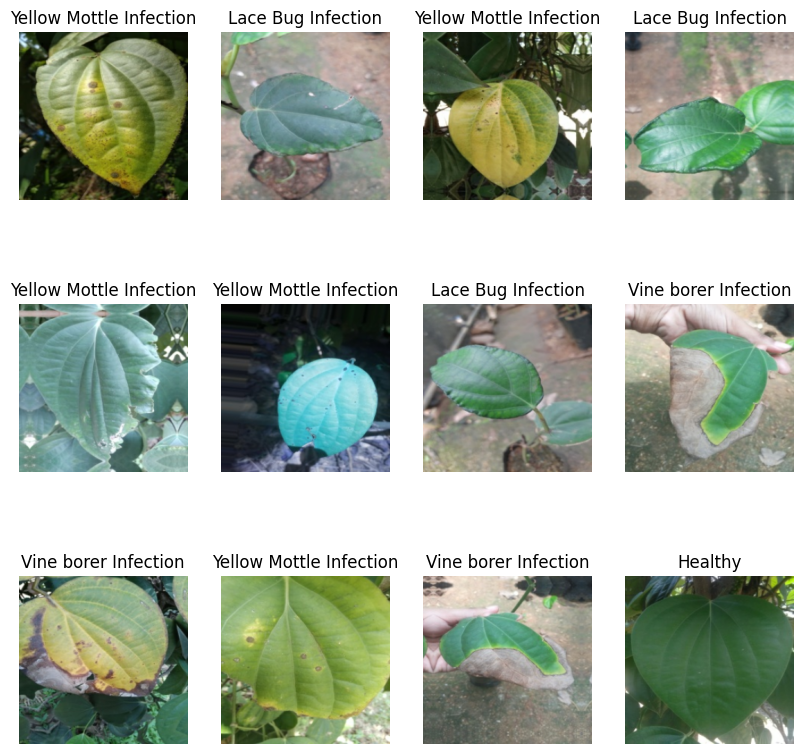

In [7]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

121

In [9]:
import os
import shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set up directories
base_dir = r"C:\Users\Chathuni\Desktop\New Model\Training"
train_dir = r"C:\Users\Chathuni\Desktop\New Model\Train"
valid_dir = r"C:\Users\Chathuni\Desktop\New Model\Validation"
test_dir = r"C:\Users\Chathuni\Desktop\New Model\Test"

# Define the class names
class_names = ['Healthy', 'Lace Bug Infection', 'Vine borer Infection', 'Yellow Mottle Infection']

# Create new directories for train, validation, and test sets
for dir in [train_dir, valid_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

# Create subdirectories for each class
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Function to move images to new directories based on split
def move_images_to_folders(dataset, train_dir, valid_dir, test_dir):
    # Split data into train, validation, and test sets
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg') or img.endswith('.png')]
        
        # Split into train, validation, and test sets (80% train, 10% validation, 10% test)
        train_images, temp_images = train_test_split(images, test_size=0.2, random_state=123)  
        valid_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=123)  
        
        # Move images to appropriate directories
        for img in train_images:
            shutil.copy(img, os.path.join(train_dir, class_name))
        for img in valid_images:
            shutil.copy(img, os.path.join(valid_dir, class_name))
        for img in test_images:
            shutil.copy(img, os.path.join(test_dir, class_name))

# Move the images
move_images_to_folders(dataset, train_dir, valid_dir, test_dir)


In [10]:
import os

def count_images_in_dir(directory):
    """Count images in each class subdirectory."""
    total_images = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            total_images += len([f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')])
    return total_images

# Count images in each directory
train_count = count_images_in_dir(train_dir)
valid_count = count_images_in_dir(valid_dir)
test_count = count_images_in_dir(test_dir)

# Print the counts
print(f"Total training images: {train_count}")
print(f"Total validation images: {valid_count}")
print(f"Total test images: {test_count}")

# Check if the split is approximately 80%/10%/10%
total_images = train_count + valid_count + test_count
print(f"Total images across all sets: {total_images}")
print(f"Expected split: 80% train, 10% validation, 10% test")
print(f"Training set should be about {0.8 * total_images:.0f} images")
print(f"Validation set should be about {0.1 * total_images:.0f} images")
print(f"Test set should be about {0.1 * total_images:.0f} images")


Total training images: 3096
Total validation images: 387
Total test images: 389
Total images across all sets: 3872
Expected split: 80% train, 10% validation, 10% test
Training set should be about 3098 images
Validation set should be about 387 images
Test set should be about 387 images


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters for loading and preprocessing images
IMAGE_SIZE = 244
BATCH_SIZE = 32

# Create ImageDataGenerators for training, validation, and test datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=20,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,   
    fill_mode='nearest'     
)

# Validation and Test Data should be only rescaled (no augmentations)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 3096 images belonging to 4 classes.
Found 387 images belonging to 4 classes.
Found 389 images belonging to 4 classes.


In [12]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)), 
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=valid_generator
)

C:\Users\Chathuni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.3687 - loss: 1.6005 - val_accuracy: 0.6331 - val_loss: 0.9792
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6186 - loss: 0.9252 - val_accuracy: 0.5866 - val_loss: 0.9501
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6503 - loss: 0.8393 - val_accuracy: 0.6873 - val_loss: 0.8130
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.6874 - loss: 0.7679 - val_accuracy: 0.7339 - val_loss: 0.7127
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.7194 - loss: 0.7329 - val_accuracy: 0.7364 - val_loss: 0.6788
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7413 - loss: 0.6484 - val_accuracy: 0.7700 - val_loss: 0.6108
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7614 - loss: 0.6095 - val_accuracy: 0.7907 - val_loss: 0.5661
Epoch 8/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7759 - loss: 0.5566 - val_accuracy: 0.7726 - v

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.9190 - loss: 0.1943
Test Accuracy: 0.9254
Test Loss: 0.1795


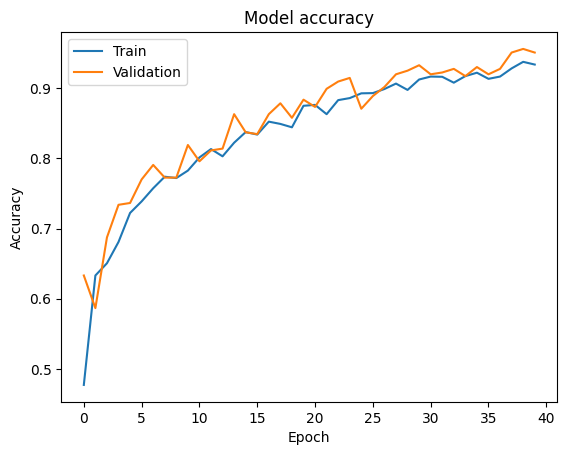

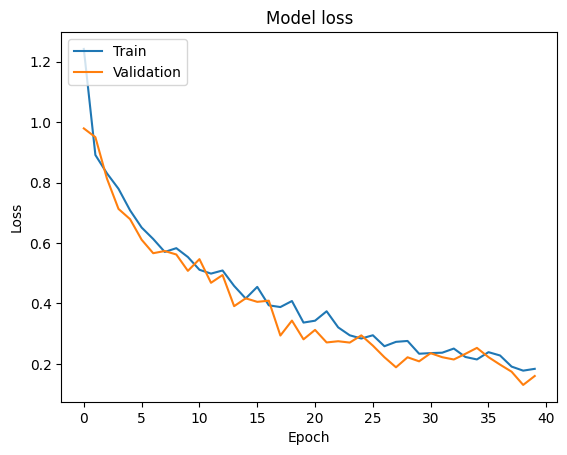

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Vine borer Infection\Vine_borer_059.jpg'
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = image.img_to_array(img) / 255.0  # Preprocess image

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict class
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Class: Lace Bug Infection


In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Healthy\Healthy_173.jpg'
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = image.img_to_array(img) / 255.0  # Preprocess image

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict class
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Class: Healthy


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Healthy\Healthy_902.jpg'
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = image.img_to_array(img) / 255.0  # Preprocess image

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict class
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: Healthy


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Lace Bug Infection\Lace_Bug_167.jpg'
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = image.img_to_array(img) / 255.0  # Preprocess image

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict class
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Lace Bug Infection


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for prediction
img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Yellow Mottle Infection\Yellow_Mottle_548.jpg'
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = image.img_to_array(img) / 255.0  # Preprocess image

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict class
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: Yellow Mottle Infection


In [21]:
# Save the entire model
model.save(r"C:\Users\Chathuni\Desktop\New Model\trained_model.h5")

In [22]:
# Save the model in the Keras format
model.save(r"C:\Users\Chathuni\Desktop\New Model\trained_model.keras")

In [26]:
# Save the model in the Keras format
model.save(r"C:\Users\Chathuni\Desktop\New Model\trained_model.keras")

In [23]:
from tensorflow.keras.models import load_model

# Load model without optimizer state
model = load_model(r"C:\Users\Chathuni\Desktop\New Model\trained_model.keras", compile=False)

# Recompile the model with the optimizer of your choice
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9413 - loss: 0.1742
Test Accuracy: 0.9254
Test Loss: 0.1795


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_class(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

img_path = r'C:\Users\Chathuni\Desktop\New Model\Train\Lace Bug Infection\Lace_Bug_018.jpg'
predicted_class = predict_class(img_path)
print(f"The predicted class is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
The predicted class is: Lace Bug Infection


In [31]:
from tensorflow.keras.models import load_model

# Load model without optimizer state
model = load_model(r"C:\Users\Chathuni\Desktop\New Model\trained_model.keras", compile=False)

# Recompile the model with the optimizer of your choice
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_class(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Healthy\Healthy_044.jpg'
predicted_class = predict_class(img_path)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The predicted class is: Healthy


In [3]:
from tensorflow.keras.models import load_model

# Load model without optimizer state
model = load_model(r"C:\Users\Chathuni\Desktop\New Model\trained_model.keras", compile=False)

# Recompile the model with the optimizer of your choice
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_class(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Lace Bug Infection\Lace_Bug_167.jpg'
predicted_class = predict_class(img_path)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The predicted class is: Lace Bug Infection


In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_class(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

img_path = r'C:\Users\Chathuni\Desktop\New Model\Test\Lace Bug Infection\Lace_Bug_946.jpg'
predicted_class = predict_class(img_path)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The predicted class is: Lace Bug Infection


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_class(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

img_path = r'D:\Pepper Dataset\Healthy\20250328_124510.jpg'
predicted_class = predict_class(img_path)
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted class is: Healthy


In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

# Set the image size expected by the model
IMAGE_SIZE = 244

# Define the class names (make sure this list matches your model's class names)
class_names = ['Healthy', 'Lace Bug Infection', 'Vine borer Infection', 'Yellow Mottle Infection']

def predict_class(img_path):
    # Open the original image to check its size before resizing
    original_img = Image.open(img_path)
    print(f"Original Image Size: {original_img.size} (Width x Height)")

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))  # Resize the image to (244, 244)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image to [0, 1] range

    # Add batch dimension (model expects input as a batch)
    img_array = np.expand_dims(img_array, axis=0)

    # Show the resized image size
    print(f"Resized Image Size: {img_array.shape[1:3]} (Width x Height)")

    # Make a prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

# Example image path
img_path = r'C:\Users\Chathuni\Downloads\20250328_165828.jpg'
predicted_class = predict_class(img_path)
print(f"The predicted class is: {predicted_class}")

Original Image Size: (4128, 1908) (Width x Height)
Resized Image Size: (244, 244) (Width x Height)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted class is: Yellow Mottle Infection


In [29]:
import tensorflow as tf

# Load your existing Keras model
model = tf.keras.models.load_model(r"C:\Users\Chathuni\Desktop\New Model\trained_model.h5")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("pepper_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Chathuni\AppData\Local\Temp\tmphf_sgxpx\assets


INFO:tensorflow:Assets written to: C:\Users\Chathuni\AppData\Local\Temp\tmphf_sgxpx\assets


Saved artifact at 'C:\Users\Chathuni\AppData\Local\Temp\tmphf_sgxpx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1324448743056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324270171344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324448743248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324448739984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324489279056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324489280016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324489279632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324489281744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324489279440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1324489279824: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
import tensorflow as tf
import numpy as np
from PIL import Image


# === Load the TensorFlow Lite model ===
interpreter = tf.lite.Interpreter(model_path="pepper_model.tflite")
interpreter.allocate_tensors()

# === Get input and output details ===
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# === Load and preprocess your image ===
# Adjust the image size to match your model's input size
img = Image.open(r"C:\Users\Chathuni\Downloads\IMG_2543.JPG").resize((244, 244))
img = np.array(img).astype(np.float32) / 255.0  # normalize
img = np.expand_dims(img, axis=0)  # add batch dimension

# === Run inference ===
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# === Get prediction ===
predicted_class = np.argmax(output_data)
print("Predicted Class Index:", predicted_class)
print("Raw Output:", output_data)

# === Optional: Map index to class name ===
class_names = ['Healthy',
 'Lace Bug Infection',
 'Vine borer Infection',
 'Yellow Mottle Infection']
print("Predicted Class:", class_names[predicted_class])


Predicted Class Index: 2
Raw Output: [[0.00317722 0.13225478 0.8236684  0.04089964]]
Predicted Class: Vine borer Infection
